### Importación de datos



In [51]:
import os
from IPython.display import Image, display

os.makedirs("images", exist_ok=True)

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


## Estructura de datos:
El conjunto de datos incluye la siguiente información:

Producto y Categoría: Artículos vendidos y sus calificaciones.

Precio y Envío: Valores de venta y costos asociados.

Fecha y ubicación de compra: Información temporal y geográfica.

Evaluación de compra: Comentarios de clientes.

Tipo de Pago y Cuotas: Métodos utilizados por los clientes.

Coordenadas Geográficas: Ubicación de las transacciones.



#1. Análisis de facturación



In [53]:
total=tienda1['Precio'].sum() + tienda2['Precio'].sum() + tienda3['Precio'].sum() + tienda4['Precio'].sum()
print("El ingreso total de todas las tiendas es: {}".format(total))

El ingreso total de todas las tiendas es: 4403619200.0


In [54]:
tiendas=["tienda1", "tienda2","tienda3","tienda4"]
total=0
for i in tiendas:
  total=total+eval(i)['Precio'].sum()
print("El ingreso total de todas las tiendas es: {}".format(total))

El ingreso total de todas las tiendas es: 4403619200.0


In [55]:
ventas_tiendas= {i: float(eval(i)['Precio'].sum()) for i in tiendas}
for i,valor in ventas_tiendas.items():
    print("La venta de la {} es: {}".format(i,valor))
#pd.DataFrame(ventas_tiendas, index=[0]).T

La venta de la tienda1 es: 1150880400.0
La venta de la tienda2 es: 1116343500.0
La venta de la tienda3 es: 1098019600.0
La venta de la tienda4 es: 1038375700.0


In [56]:
#Porcentaje por tiendas de las ventas totales
tiendas_df = [tienda1, tienda2, tienda3, tienda4]
tiendas_nombres = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

total_ventas_global = sum(df['Precio'].sum() for df in tiendas_df)

for i, tienda_df in enumerate(tiendas_df):
  venta_tienda = tienda_df['Precio'].sum()
  porcentaje_venta = (venta_tienda / total_ventas_global) * 100
  print(f"El porcentaje de ventas para {tiendas_nombres[i]} es: {porcentaje_venta:.2f}%")

El porcentaje de ventas para Tienda 1 es: 26.13%
El porcentaje de ventas para Tienda 2 es: 25.35%
El porcentaje de ventas para Tienda 3 es: 24.93%
El porcentaje de ventas para Tienda 4 es: 23.58%


# 2. Ventas por categoría

In [57]:
for i in tiendas:
     print(f"\nLas categorías más populares de la {i} son:\n{eval(i).groupby('Categoría del Producto')['Precio'].count().sort_values(ascending=False).head()}")


Las categorías más populares de la tienda1 son:
Categoría del Producto
Muebles                 465
Electrónicos            448
Juguetes                324
Electrodomésticos       312
Deportes y diversión    284
Name: Precio, dtype: int64

Las categorías más populares de la tienda2 son:
Categoría del Producto
Muebles                 442
Electrónicos            422
Juguetes                313
Electrodomésticos       305
Deportes y diversión    275
Name: Precio, dtype: int64

Las categorías más populares de la tienda3 son:
Categoría del Producto
Muebles                 499
Electrónicos            451
Juguetes                315
Electrodomésticos       278
Deportes y diversión    277
Name: Precio, dtype: int64

Las categorías más populares de la tienda4 son:
Categoría del Producto
Muebles                 480
Electrónicos            451
Juguetes                338
Deportes y diversión    277
Electrodomésticos       254
Name: Precio, dtype: int64


In [58]:
for i in tiendas:
     print(f"\nLas categorías más populares de la {i} son:\n{eval(i).groupby('Categoría del Producto')['Categoría del Producto'].count().sort_values(ascending=False).head()}")


Las categorías más populares de la tienda1 son:
Categoría del Producto
Muebles                 465
Electrónicos            448
Juguetes                324
Electrodomésticos       312
Deportes y diversión    284
Name: Categoría del Producto, dtype: int64

Las categorías más populares de la tienda2 son:
Categoría del Producto
Muebles                 442
Electrónicos            422
Juguetes                313
Electrodomésticos       305
Deportes y diversión    275
Name: Categoría del Producto, dtype: int64

Las categorías más populares de la tienda3 son:
Categoría del Producto
Muebles                 499
Electrónicos            451
Juguetes                315
Electrodomésticos       278
Deportes y diversión    277
Name: Categoría del Producto, dtype: int64

Las categorías más populares de la tienda4 son:
Categoría del Producto
Muebles                 480
Electrónicos            451
Juguetes                338
Deportes y diversión    277
Electrodomésticos       254
Name: Categoría del Pro

# 3. Calificación promedio de la tienda


In [59]:
for i in tiendas:
     print(f"\nLa calificación promedio de la {i} es:\n{round(eval(i)['Calificación'].mean(),2)}")


La calificación promedio de la tienda1 es:
3.98

La calificación promedio de la tienda2 es:
4.04

La calificación promedio de la tienda3 es:
4.05

La calificación promedio de la tienda4 es:
4.0


# 4. Productos más y menos vendidos

In [60]:
for i in tiendas:
     print(f"\nLos productos más vendidos de la {i} son:\n{eval(i).groupby('Producto')['Producto'].count().sort_values(ascending=False).head(5)}")
     print(f"\nLos productos menos vendidos de la {i} son:\n{eval(i).groupby('Producto')['Producto'].count().sort_values(ascending=True).head(5)}")


Los productos más vendidos de la tienda1 son:
Producto
Armario             60
TV LED UHD 4K       60
Microondas          60
Secadora de ropa    58
Mesa de noche       56
Name: Producto, dtype: int64

Los productos menos vendidos de la tienda1 son:
Producto
Auriculares con micrófono      33
Celular ABXY                   33
Olla de presión                35
Pandereta                      36
Ciencia de datos con Python    39
Name: Producto, dtype: int64

Los productos más vendidos de la tienda2 son:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Pandereta                    58
Guitarra acústica            58
Name: Producto, dtype: int64

Los productos menos vendidos de la tienda2 son:
Producto
Juego de mesa      32
Impresora          34
Mesa de comedor    34
Sillón             35
Auriculares        37
Name: Producto, dtype: int64

Los productos más vendidos de la tienda3 son:
Producto
Kit de bancas      57
Mesa de comedor    56
C

# 5. Envío promedio por tienda

In [61]:
for i in tiendas:
     print(f"\nEl costo de envío promedio de la {i} es:\n{round(eval(i)['Costo de envío'].mean(),2)}")


El costo de envío promedio de la tienda1 es:
26018.61

El costo de envío promedio de la tienda2 es:
25216.24

El costo de envío promedio de la tienda3 es:
24805.68

El costo de envío promedio de la tienda4 es:
23459.46


## **Generando gráfico**

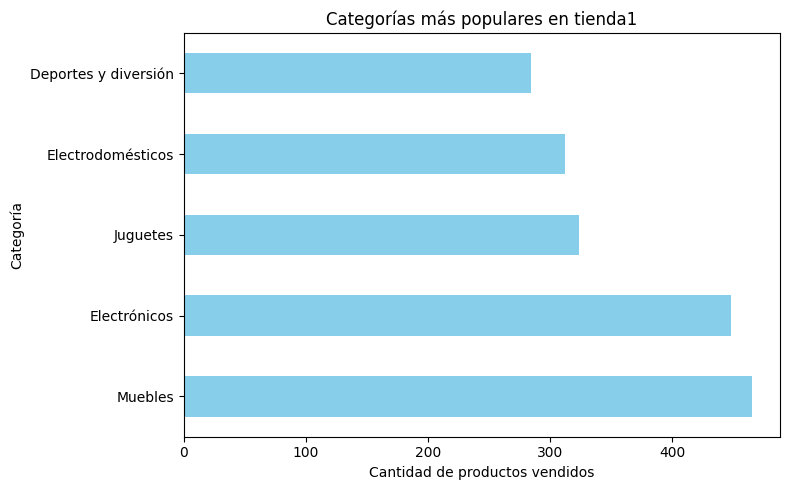

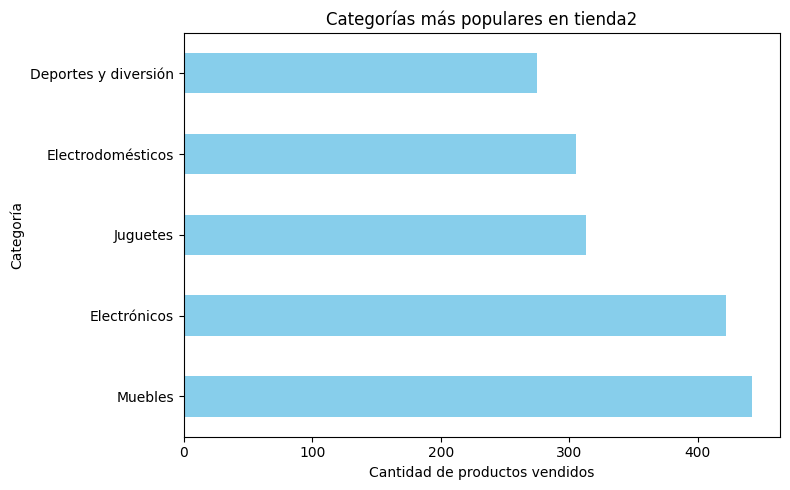

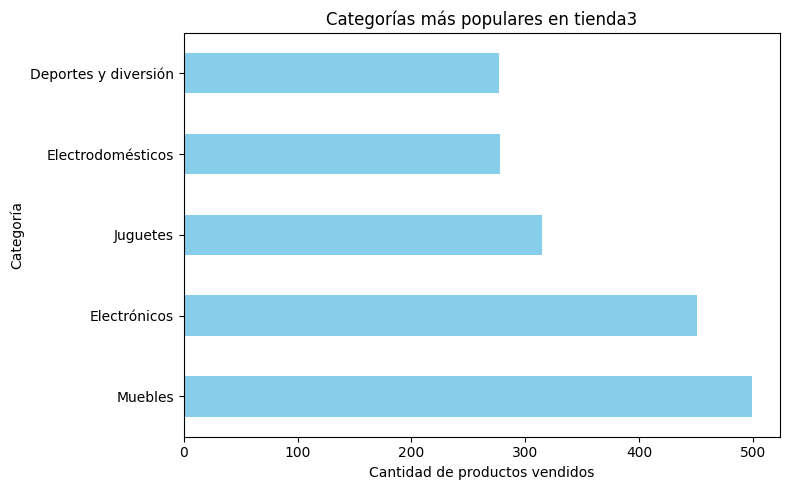

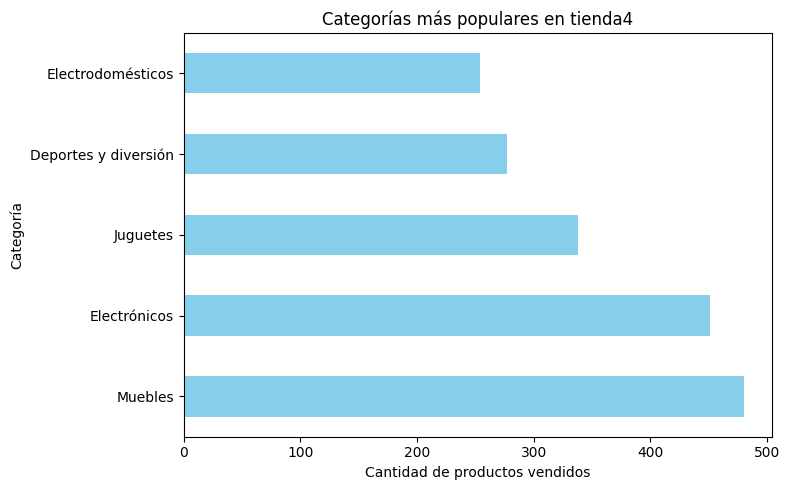

In [62]:
#Categorías

import matplotlib.pyplot as plt

for i in tiendas:
    df = eval(i)
    top_categorias = df['Categoría del Producto'].value_counts().head(5)

    plt.figure(figsize=(8, 5))
    top_categorias.plot(kind='barh', color='skyblue')
    plt.title(f'Categorías más populares en {i}')
    plt.xlabel('Cantidad de productos vendidos')
    plt.ylabel('Categoría')
    plt.tight_layout()
    #plt.savefig('images/CategoriaPopular.png', dpi=300) #Para jupyter
    plt.savefig(f"/content/drive/MyDrive/Images/CategoriaPopular.png")
    plt.show()

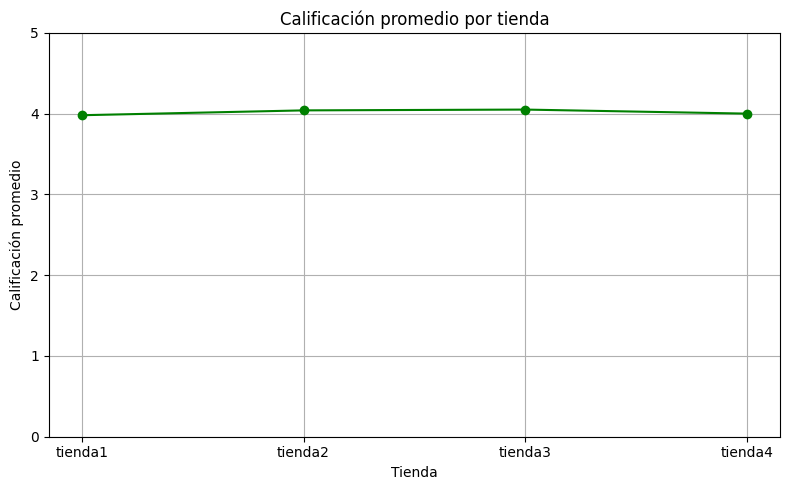

In [63]:
# Calificaciones promedio de las tiendas

import matplotlib.pyplot as plt

tiendas_nombres = []
calificaciones = []

for i in tiendas:
    tiendas_nombres.append(i)
    calificaciones.append(round(eval(i)['Calificación'].mean(), 2))

plt.figure(figsize=(8, 5))
plt.plot(tiendas_nombres, calificaciones, marker='o', linestyle='-', color='green')
plt.title('Calificación promedio por tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación promedio')
plt.ylim(0, 5)
plt.grid(True)
plt.tight_layout()
#plt.savefig('images/CalificacionPromedio.png', dpi=300)
plt.savefig(f"/content/drive/MyDrive/Images/CalificacionPromedio.png")
plt.show()


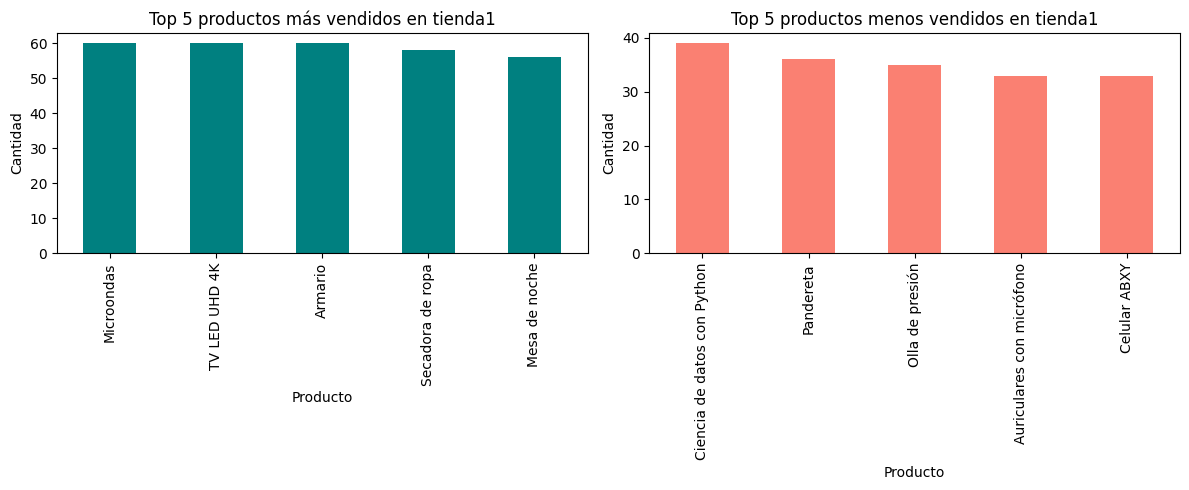

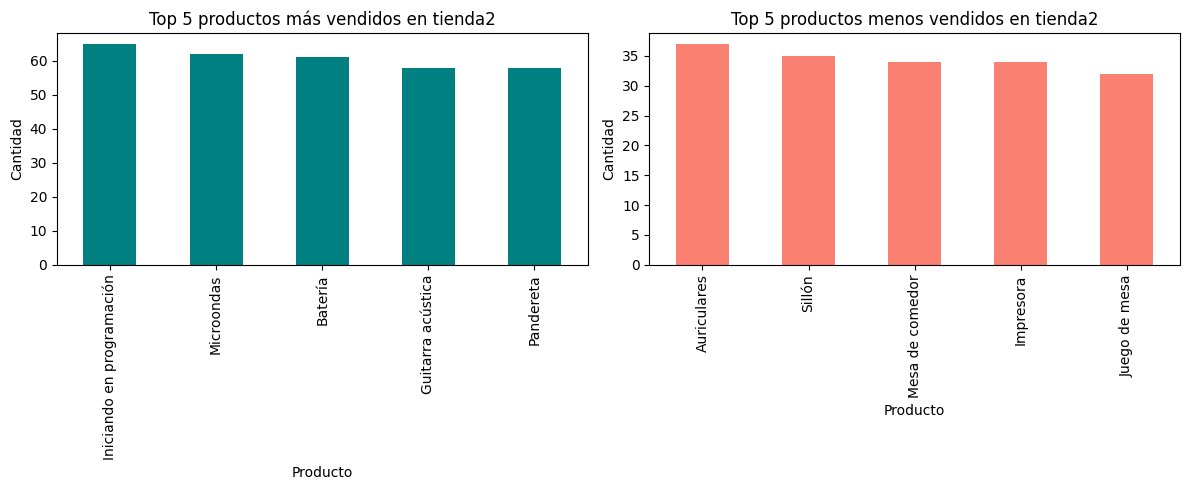

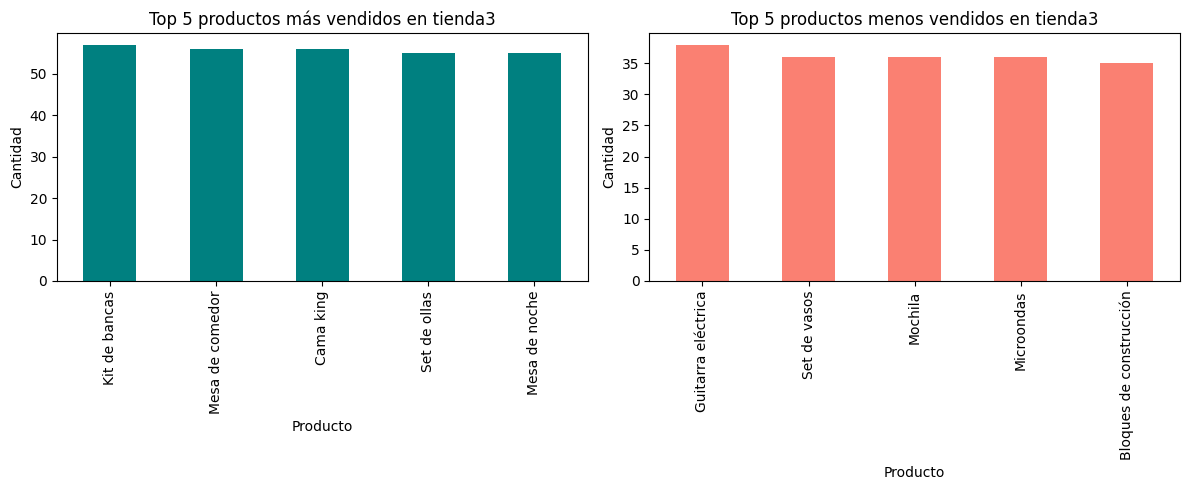

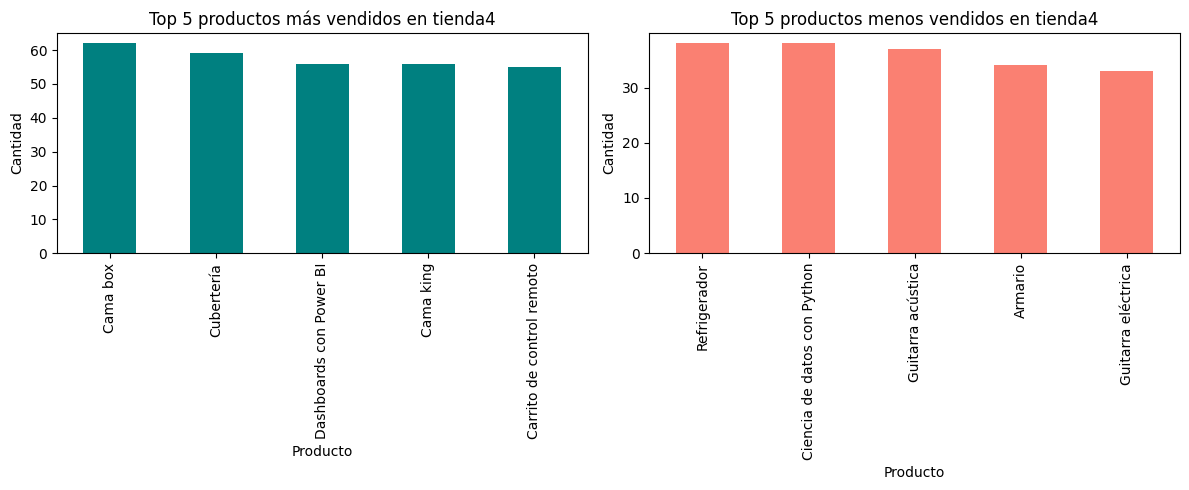

In [64]:
#productos más y menos vendidos

for i in tiendas:
    df = eval(i)
    vendidos = df['Producto'].value_counts()
    top5 = vendidos.head(5)
    bottom5 = vendidos.tail(5)

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    top5.plot(kind='bar', ax=axs[0], color='teal')
    axs[0].set_title(f'Top 5 productos más vendidos en {i}')
    axs[0].set_ylabel('Cantidad')

    bottom5.plot(kind='bar', ax=axs[1], color='salmon')
    axs[1].set_title(f'Top 5 productos menos vendidos en {i}')
    axs[1].set_ylabel('Cantidad')

    plt.tight_layout()
    #plt.savefig('images/ProductosVendidos.png', dpi=300)
    plt.savefig(f"/content/drive/MyDrive/Images/ProductosVendidos.png")
    plt.show()

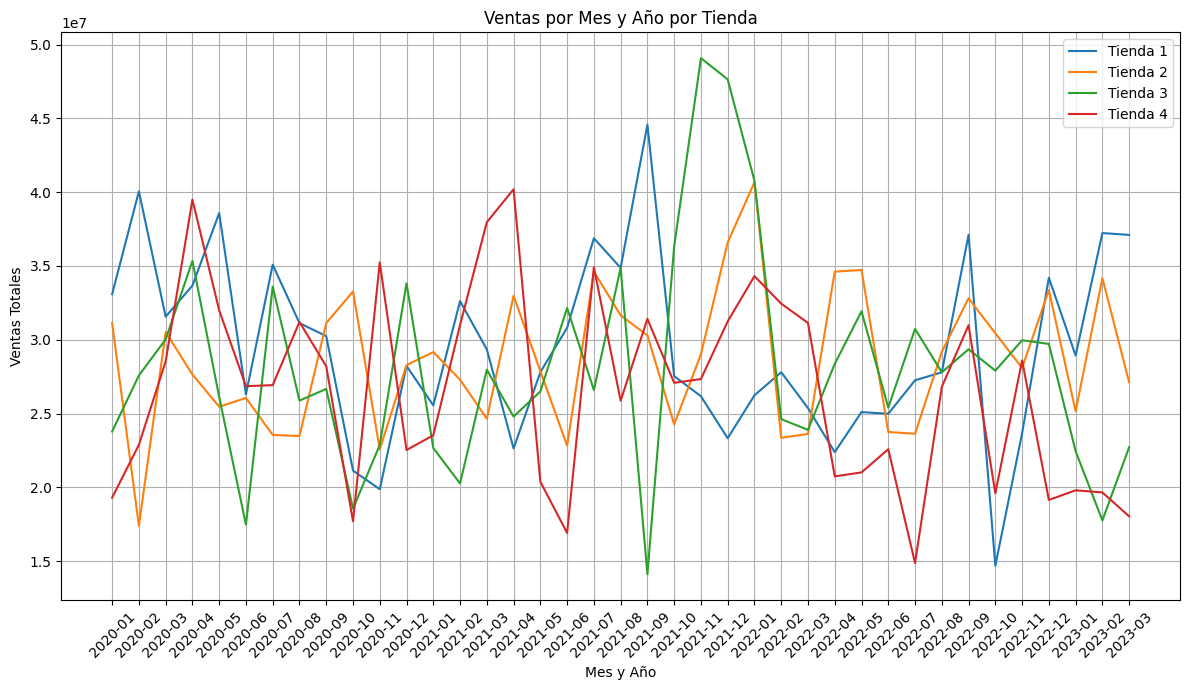

In [65]:
#Ventas por tienda y mes
import pandas as pd
import matplotlib.pyplot as plt
# Preparar datos para el gráfico de líneas de ventas por mes y año
# Convertir la columna 'Fecha de Compra' a datetime objects, especificando el formato
# O usando dayfirst=True si el formato es consistente y dia/mes/año
tienda1['Fecha de Compra'] = pd.to_datetime(tienda1['Fecha de Compra'], dayfirst=True)
tienda2['Fecha de Compra'] = pd.to_datetime(tienda2['Fecha de Compra'], dayfirst=True)
tienda3['Fecha de Compra'] = pd.to_datetime(tienda3['Fecha de Compra'], dayfirst=True)
tienda4['Fecha de Compra'] = pd.to_datetime(tienda4['Fecha de Compra'], dayfirst=True)

tienda1['Mes_Año'] = tienda1['Fecha de Compra'].dt.to_period('M')
tienda2['Mes_Año'] = tienda2['Fecha de Compra'].dt.to_period('M')
tienda3['Mes_Año'] = tienda3['Fecha de Compra'].dt.to_period('M')
tienda4['Mes_Año'] = tienda4['Fecha de Compra'].dt.to_period('M')

ventas_por_mes_tienda1 = tienda1.groupby('Mes_Año')['Precio'].sum()
ventas_por_mes_tienda2 = tienda2.groupby('Mes_Año')['Precio'].sum()
ventas_por_mes_tienda3 = tienda3.groupby('Mes_Año')['Precio'].sum()
ventas_por_mes_tienda4 = tienda4.groupby('Mes_Año')['Precio'].sum()

# Convertir el índice de Period a string para plotting
ventas_por_mes_tienda1.index = ventas_por_mes_tienda1.index.astype(str)
ventas_por_mes_tienda2.index = ventas_por_mes_tienda2.index.astype(str)
ventas_por_mes_tienda3.index = ventas_por_mes_tienda3.index.astype(str)
ventas_por_mes_tienda4.index = ventas_por_mes_tienda4.index.astype(str)


# 4. Gráfico de líneas para las ventas por mes y año por tienda
plt.figure(figsize=(12, 7))
plt.plot(ventas_por_mes_tienda1.index, ventas_por_mes_tienda1.values, label='Tienda 1')
plt.plot(ventas_por_mes_tienda2.index, ventas_por_mes_tienda2.values, label='Tienda 2')
plt.plot(ventas_por_mes_tienda3.index, ventas_por_mes_tienda3.values, label='Tienda 3')
plt.plot(ventas_por_mes_tienda4.index, ventas_por_mes_tienda4.values, label='Tienda 4')

plt.title('Ventas por Mes y Año por Tienda')
plt.xlabel('Mes y Año')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
#plt.savefig('images/VentasPorMes.png', dpi=300)
plt.savefig(f"/content/drive/MyDrive/Images/VentasPorMes.png")
plt.show()

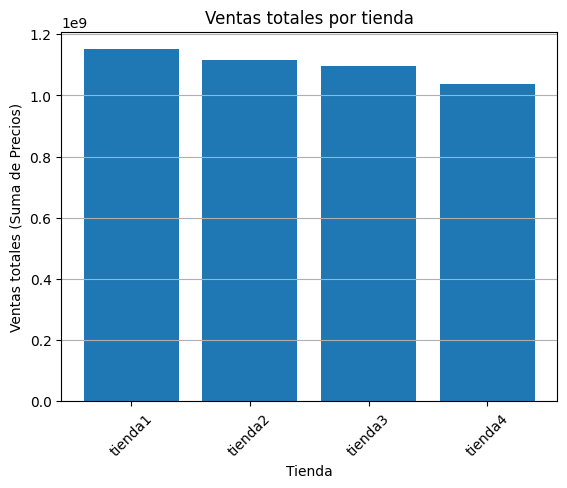

In [66]:
#ventas totales

# Crear un diccionario con los ingresos por tienda
ventas_tiendas = {i: eval(i)['Precio'].sum() for i in tiendas}

plt.bar(ventas_tiendas.keys(), ventas_tiendas.values())
plt.xlabel('Tienda')
plt.ylabel('Ventas totales (Suma de Precios)')
plt.title('Ventas totales por tienda')
plt.xticks(rotation=45)
plt.grid(axis='y')
#plt.savefig('images/VentasTotales.png', dpi=300)
plt.savefig(f"/content/drive/MyDrive/Images/VentasTotales.png")
plt.show()

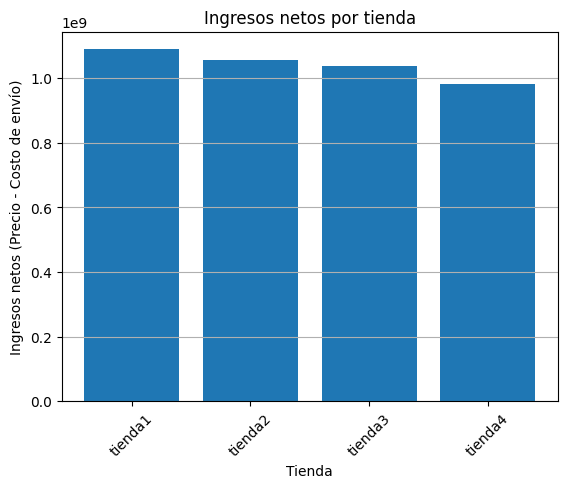

In [67]:
# Crear un diccionario con los ingresos netos (Precio - Costo de envío) por tienda
ingresos_netos_tiendas = {
    i: (eval(i)['Precio'] - eval(i)['Costo de envío']).sum()
    for i in tiendas
}

# Graficar
plt.bar(ingresos_netos_tiendas.keys(), ingresos_netos_tiendas.values())
plt.xlabel('Tienda')
plt.ylabel('Ingresos netos (Precio - Costo de envío)')
plt.title('Ingresos netos por tienda')
plt.xticks(rotation=45)
plt.grid(axis='y')
#plt.savefig('images/IngresosNetos.png', dpi=300)
plt.savefig(f"/content/drive/MyDrive/Images/IngresosNetos.png")
plt.show()



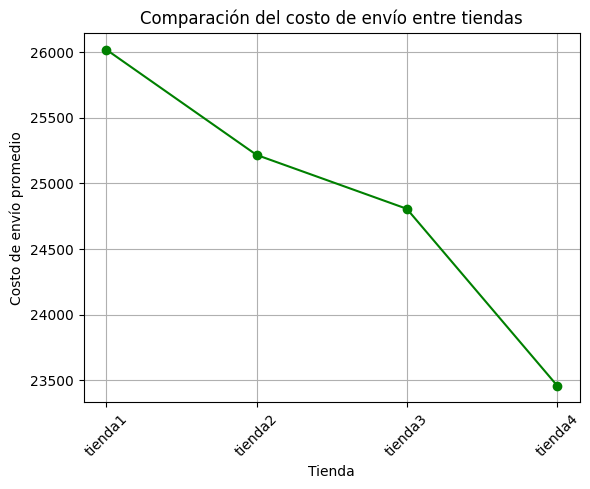

In [68]:
# Costo de envío por tienda
envios = {i: round(eval(i)['Costo de envío'].mean(), 2) for i in tiendas}

plt.plot(list(envios.keys()), list(envios.values()), marker='o', linestyle='-', color='green')
plt.xlabel('Tienda')
plt.ylabel('Costo de envío promedio')
plt.title('Comparación del costo de envío entre tiendas')
plt.grid(True)
plt.xticks(rotation=45)
#plt.savefig('images/CostoEnvio.png', dpi=300)
plt.savefig(f"/content/drive/MyDrive/Images/CostoEnvio.png")
plt.show()


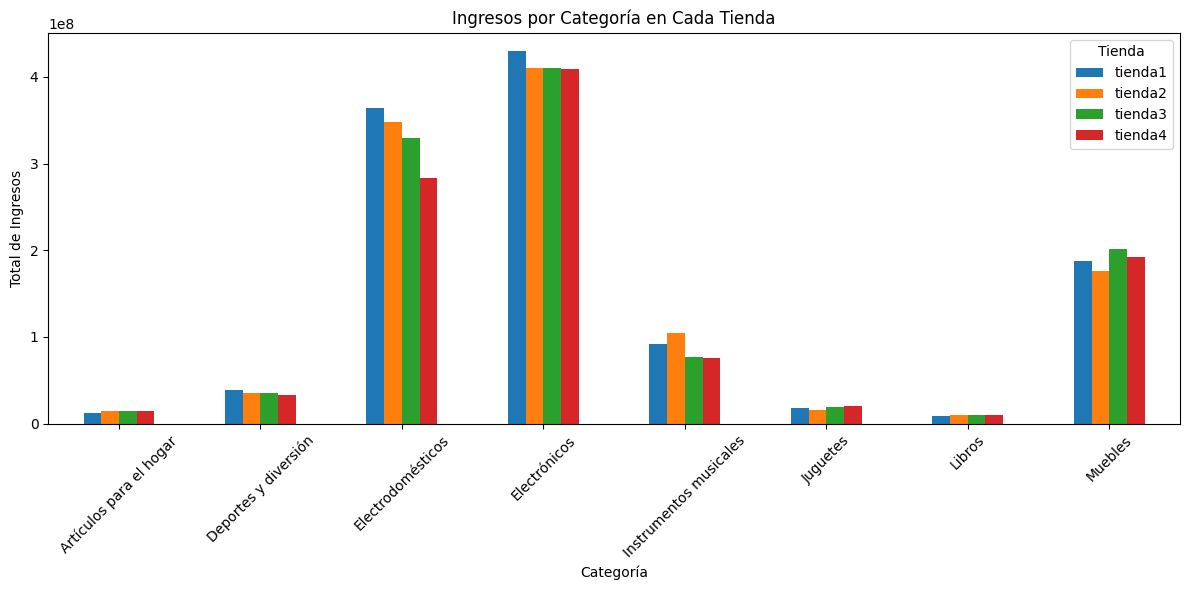

In [69]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear DataFrame vacío para acumular resultados
ingresos_categoria = pd.DataFrame()

tiendas = {
    'tienda1': tienda1,  # ← son los DataFrames reales
    'tienda2': tienda2,
    'tienda3': tienda3,
    'tienda4': tienda4
}



# Crear un DataFrame vacío para juntar los ingresos por tienda
ingresos_por_categoria = pd.DataFrame()

# Agrupar y sumar por tienda
for nombre, df in tiendas.items():
    ingresos = df.groupby("Categoría del Producto")["Precio"].sum()
    ingresos_por_categoria[nombre] = ingresos

# Rellenar vacíos con 0
ingresos_por_categoria = ingresos_por_categoria.fillna(0)

# Hacer gráfico
ingresos_por_categoria.plot(kind='bar', figsize=(12,6))
plt.title("Ingresos por Categoría en Cada Tienda")
plt.xlabel("Categoría")
plt.ylabel("Total de Ingresos")
plt.legend(title="Tienda")
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('images/IngresosPorCategoria.png', dpi=300)
plt.savefig(f"/content/drive/MyDrive/Images/IngresosPorCategoria.png")
plt.show()



#**Informe final**

**Introducción:**

El propósito de este informe es apoyar al Sr. Juan, propietario de la cadena Alura Store, en la decisión de vender una de sus cuatro tiendas. La venta se enmarca en su interés por iniciar un nuevo emprendimiento, por lo que se requiere una decisión informada basada en un análisis detallado de los datos de ventas, calificaciones de clientes, costos operativos y rendimiento general.

Se han analizado múltiples factores de cada tienda: volumen de ventas, ingreso neto, opiniones de clientes, costo de envío, categorías y productos vendidos así como también se han utilizado algunos gráficos. El objetivo es identificar cuál tienda presenta un rendimiento más bajo así justificar su posible venta.


**Desarrollo:**

1.Ventas Generales y por tiendas:

Las ventas totales de todas las tiendas suman: 4403619200.

| Tienda   | Ventas Totales (S/.) |
|----------|----------------------|
| Tienda 1 | 1,150,880,400        |
| Tienda 2 | 1,116,343,500        |
| Tienda 3 | 1,098,019,600        |
| Tienda 4 | 1,038,375,700        |


Porcentaje de la venta total que representa cada tienda:

| Tienda   | % Ventas en relación al total |
|----------|-------------------------------|
| Tienda 1 | 26.13%                 |
| Tienda 2 | 25.35%                 |
| Tienda 3 | 24.93%                 |
| Tienda 4 | 23.58%                 |


<img src="https://drive.google.com/uc?export=view&id=1Y6HAKMpfHkwaH7x0g_EmxvJzyTGRyv8B" width="600"/>


En el siguiente gráfico de líneas se puede observar el comportamiento temporal de las ventas de las cuatro tiendas:


<img src="https://drive.google.com/uc?export=view&id=1j2t3m_NiOo59I2S8YbWgMmH9Odqvbv6l" width="600"/>




Observación: La Tienda 4 es la que registra las ventas más bajas representando un 23.59% de las ventas totales y la Tienda 1 es la que tiene las ventas más altas representando un 26.13% de las ventas totales. Además en el gráfico lineal se observa que la Tienda 4 ha tenido un repunte en comparación de las demás en un período breve y en su actual desempeño no se ve un crecimiento futuro ya que se ve que está descendiendo.








2. Costo Promedio de Envío

| Tienda   | Costo Promedio (S/.) |
|----------|----------------------|
| Tienda 1 | 26,018.61        |
| Tienda 2 | 25,216.24        |
| Tienda 3 | 24,805.68        |
| Tienda 4 | 23,459.46        |


<img src="https://drive.google.com/uc?export=view&id=1SNUy6WnB6LjEHZ8geg2uuXGJvA5YnGeK" width="600"/>



Observación: La Tienda 1 tiene los costos más altos de envío. Sin embargo, la diferencia no es significativa como para compensar los menores ingresos netos de la Tienda 4.


3. Ingreso Neto (Ventas - Costo de Envío)


| Tienda   | Ingreso Neto (S/.) |
|----------|----------------------|
| Tienda 1 | 1,089,502,500        |
| Tienda 2 | 1,116,343,500        |
| Tienda 3 | 1,039,503,000        |
| Tienda 4 | 983,058,300          |

Observación: Nuevamente, la Tienda 4 muestra el ingreso neto más bajo a pesar de sus costos de envíos bajos.

4. Opiniones de Clientes (Promedio)


| Tienda   | Calificación Promedio|
|----------|----------------------|
| Tienda 1 | 3.98       |
| Tienda 2 | 4.04       |
| Tienda 3 | 4.05       |
| Tienda 4 | 4.00       |



<img src="https://drive.google.com/uc?export=view&id=1Zu982Oe-uxrmhEHfUZAejv32FHvJXxug" width="600"/>


Observación: La Tienda 3 tiene la mejor calificación, la Tienda 1 es la más baja en satisfacción según la valoración generada por los clientes.

5. Popularidad por Categoría

<img src="https://drive.google.com/uc?export=view&id=1tdKtN7_Z66d1oV6x__FgcEhNVbPtG2Pu" width="600"/>

Las 4 tiendas comparten las mismas categorías más populares: Muebles, Electrónicos y electrodomésticos.

La Tienda 3 lidera en cantidad de ventas en estas categorías.

6. Rotación de Productos

Aunque no se tienen datos explícitos de inventario, la frecuencia de venta puede aproximarse a la rotación. La Tienda 4 tiene productos bien vendidos, pero también muchos con ventas bajas, lo que indica una rotación desequilibrada.

7. Clasificación de Desempeño Regional

En el análisis por región y categoría:

Si bien todas parecen tener un valor por encima del promedio. La tienda 4 es la única que presenta una tienda con valor bajo.

| Tienda  | Alto | Bajo | Medio |
|---------|------|------|--------|
| tienda1 |  5   |  3   |   11   |
| tienda2 |  4   |  6   |   9    |
| tienda3 |  5   |  4   |   10   |
| tienda4 |  5   |  6   |   8    |


**Conclusión y recomendación**

Después de un análisis integral, se recomienda que el Sr. Juan considere vender la Tienda 4. A pesar de tener el menor costo de envío, su:

*   Menor volumen de ventas
*   Ingreso neto más bajo a pesar se su menor costo de envío
*   Desempeño regional inferior
*   En cinco categorías muestra ventas más bajas que las demás tiendas. A nivel de producto no es la peor a nivel de tiendas y tiene dos productos que venden bien pero tiene productos con muy baja rotación.

La posicionan como la tienda menos rentable y menos estratégica dentro del portafolio de Alura Store.

Mientras que las otras tiendas muestran fortalezas claras (como mejores opiniones, mayores ingresos o liderazgo por categoría), la Tienda 4 no destaca en ninguna métrica y sí muestra debilidades sostenidas. Es importante notar que tampoco las demás tienen ventajas muy significativas que Tienda 4 pero a pesar de esto esta no destaca sobre las demás.


#**Análisis del desempeño geográfico**

Visualización de tiendas por localidad, número de tiendas por localidad y ventas por tienda.

In [70]:
import folium
from folium import CircleMarker
from IPython.display import display
import ipywidgets as widgets
from folium.plugins import MarkerCluster
import pandas as pd

# --- Preparar DataFrame unificado con nombre de tienda ---
df_todas = pd.concat([
    df.assign(Tienda=nombre) for nombre, df in tiendas.items()
    if not nombre.endswith('_desempeño')
])

# Asumimos que 'Lugar de Compra' es la localidad o ciudad
df_todas['Ingreso Neto'] = df_todas['Precio']  # O reemplaza con 'Precio - Costo de envío' si corresponde

# Agrupamos por localidad y tienda
ingreso_por_localidad_tienda = df_todas.groupby(['Lugar de Compra', 'Tienda', 'lat', 'lon'])['Ingreso Neto'].sum().reset_index()

# Calcular cuartiles por localidad
percentiles = ingreso_por_localidad_tienda.groupby('Lugar de Compra')['Ingreso Neto'].quantile([0.25, 0.75]).unstack().reset_index()
percentiles.columns = ['Lugar de Compra', 'P25', 'P75']

# Unimos para clasificación
df_clasificado = ingreso_por_localidad_tienda.merge(percentiles, on='Lugar de Compra')

def clasificar_cuartil(ingreso, p25, p75):
    if ingreso >= p75:
        return 'Alto'
    elif ingreso <= p25:
        return 'Bajo'
    else:
        return 'Medio'

df_clasificado['Categoría'] = df_clasificado.apply(
    lambda row: clasificar_cuartil(row['Ingreso Neto'], row['P25'], row['P75']), axis=1
)

# Dropdowns para tienda y localidad
dropdown_tienda = widgets.Dropdown(
    options=['Todas'] + sorted(df_clasificado['Tienda'].unique()),
    description='Tienda:',
    layout=widgets.Layout(width='300px')
)

dropdown_localidad = widgets.Dropdown(
    options=['Todas'] + sorted(df_clasificado['Lugar de Compra'].unique()),
    description='Localidad:',
    layout=widgets.Layout(width='300px')
)

# Colores para cada categoría
color_map = {'Alto': 'green', 'Medio': 'orange', 'Bajo': 'red'}

# Función de visualización
def mostrar_mapa(tienda_seleccionada, localidad_seleccionada):
    df_filtro = df_clasificado.copy()
    if tienda_seleccionada != 'Todas':
        df_filtro = df_filtro[df_filtro['Tienda'] == tienda_seleccionada]
    if localidad_seleccionada != 'Todas':
        df_filtro = df_filtro[df_filtro['Lugar de Compra'] == localidad_seleccionada]

    if df_filtro.empty:
        print("No hay datos para la selección actual.")
        return

    mapa = folium.Map(location=[df_filtro['lat'].mean(), df_filtro['lon'].mean()], zoom_start=6)
    cluster = MarkerCluster().add_to(mapa)

    for _, row in df_filtro.iterrows():
        color = color_map.get(row['Categoría'], 'gray')
        folium.CircleMarker(
            location=[row['lat'], row['lon']],
            radius=7,
            fill=True,
            color=color,
            fill_opacity=0.7,
            popup=f"{row['Tienda']}<br>Localidad: {row['Lugar de Compra']}<br>Categoría: {row['Categoría']}<br>Ingreso Neto: $.{round(row['Ingreso Neto'], 2):,.2f}"
        ).add_to(cluster)

    display(mapa)

# Mostrar widgets interactivos
widgets.interact(mostrar_mapa, tienda_seleccionada=dropdown_tienda, localidad_seleccionada=dropdown_localidad)


interactive(children=(Dropdown(description='Tienda:', layout=Layout(width='300px'), options=('Todas', 'tienda1…

<function __main__.mostrar_mapa(tienda_seleccionada, localidad_seleccionada)>

Dataframe de desempeño agrupando tienda y localidad deacuerdo a las ventas usando cuartiles.

In [71]:
df_todas = pd.concat([df.assign(Tienda=nombre) for nombre, df in tiendas.items()])
df_todas['Ingreso Neto'] = df_todas['Precio'] - df_todas['Costo de envío']

# Sumar por región y tienda
ingreso_por_region_tienda = df_todas.groupby(['Lugar de Compra', 'Tienda'])['Ingreso Neto'].sum().reset_index()
promedio_por_region = df_todas.groupby('Lugar de Compra')['Ingreso Neto'].mean().reset_index().rename(columns={'Ingreso Neto': 'Promedio Región'})

# Comparar con promedio regional
comparacion = ingreso_por_region_tienda.merge(promedio_por_region, on='Lugar de Compra')
comparacion['Desempeño Relativo'] = comparacion['Ingreso Neto'] - comparacion['Promedio Región']

# Clasificación
# def clasificar(desempeño, promedio):
#     if desempeño >= promedio * 0.2:
#         return 'Alto'
#     elif desempeño <= -promedio * 0.2:
#         return 'Bajo'
#     else:
#         return 'Medio'

def clasificar_por_percentiles(valor, q1, q3):
    if valor >= q3:
        return 'Alto'
    elif valor <= q1:
        return 'Bajo'
    else:
        return 'Medio'

q1 = comparacion['Desempeño Relativo'].quantile(0.25)
q3 = comparacion['Desempeño Relativo'].quantile(0.75)

comparacion['Categoría'] = comparacion['Desempeño Relativo'].apply(lambda x: clasificar_por_percentiles(x, q1, q3))
# comparacion['Categoría'] = comparacion.apply(
#     lambda row: clasificar(row['Desempeño Relativo'], row['Promedio Región']),
#     axis=1
# )

# Añadir coordenadas (lat/lon) por lugar de compra (puedes personalizar esto si las tienes aparte)
coordenadas = df_todas.groupby('Lugar de Compra')[['lat', 'lon']].mean().reset_index()
comparacion = comparacion.merge(coordenadas, on='Lugar de Compra', how='left')
comparacion

,Lugar de Compra,Tienda,Ingreso Neto,Promedio Región,Desempeño Relativo,Categoría,lat,lon
0,Armenia,tienda1,4373300.0,414378.571429,3.958921e+06,Medio,4.53389,-75.68111
1,Armenia,tienda2,3185100.0,414378.571429,2.770721e+06,Bajo,4.53389,-75.68111
2,Armenia,tienda3,3774200.0,414378.571429,3.359821e+06,Medio,4.53389,-75.68111
3,Armenia,tienda4,270000.0,414378.571429,-1.443786e+05,Bajo,4.53389,-75.68111
4,Barranquilla,tienda1,31129600.0,403244.838710,3.072636e+07,Medio,10.96854,-74.78132
...,...,...,...,...,...,...,...,...
71,Valledupar,tienda4,999000.0,398428.571429,6.005714e+05,Bajo,10.46314,-73.25322
72,Villavicencio,tienda1,6780100.0,434679.310345,6.345421e+06,Medio,4.14200,-73.62664
73,Villavicencio,tienda2,3400500.0,434679.310345,2.965821e+06,Bajo,4.14200,-73.62664
74,Villavicencio,tienda3,928900.0,434679.310345,4.942207e+05,Bajo,4.14200,-73.62664


Cuantas localidades por tienda se encuentran en un nivel Alto, Bajo , Medio deacuerdo a los cuartiles.

In [72]:
conteo_por_tienda = comparacion.groupby(['Tienda', 'Categoría']).size().unstack(fill_value=0)
print(conteo_por_tienda)

Categoría  Alto  Bajo  Medio
Tienda                      
tienda1       5     3     11
tienda2       4     6      9
tienda3       5     4     10
tienda4       5     6      8


Mapa de color (Heatmap) deacuerdo al nivel de ventas donde rojo indica un nivel de ventas mayor.

In [73]:
import pandas as pd
import folium
from folium import CircleMarker
from folium.plugins import HeatMap
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# Crear df_todas
df_todas = pd.concat(
    [df.assign(Tienda=nombre) for nombre, df in tiendas.items() if not nombre.endswith('_desempeño')]
)
df_todas['Ingreso Neto'] = df_todas['Precio'] - df_todas['Costo de envío']

# Agrupación para comparación
ingreso_por_region_tienda = df_todas.groupby(['Lugar de Compra', 'Tienda'])['Ingreso Neto'].sum().reset_index()
promedio_por_region = df_todas.groupby('Lugar de Compra')['Ingreso Neto'].mean().reset_index().rename(columns={'Ingreso Neto': 'Promedio Región'})
comparacion = ingreso_por_region_tienda.merge(promedio_por_region, on='Lugar de Compra')
comparacion['Desempeño Relativo'] = comparacion['Ingreso Neto'] - comparacion['Promedio Región']

# Clasificación por cuartiles
def clasificar_por_percentiles(valor, q1, q3):
    if valor >= q3:
        return 'Alto'
    elif valor <= q1:
        return 'Bajo'
    else:
        return 'Medio'

q1 = comparacion['Desempeño Relativo'].quantile(0.25)
q3 = comparacion['Desempeño Relativo'].quantile(0.75)
comparacion['Categoría'] = comparacion['Desempeño Relativo'].apply(lambda x: clasificar_por_percentiles(x, q1, q3))

# Coordenadas por lugar
coordenadas = df_todas.groupby('Lugar de Compra')[['lat', 'lon']].mean().reset_index()
comparacion = comparacion.merge(coordenadas, on='Lugar de Compra', how='left')

# Widgets
opciones_region = ['Todas'] + sorted(comparacion['Lugar de Compra'].unique())
dropdown_region = widgets.Dropdown(
    options=opciones_region,
    description='Región:',
    layout=widgets.Layout(width='50%')
)

opciones_tienda = ['Todas'] + sorted(comparacion['Tienda'].unique())
dropdown_tienda = widgets.Dropdown(
    options=opciones_tienda,
    description='Tienda:',
    layout=widgets.Layout(width='50%')
)

color_map = {'Alto': 'green', 'Medio': 'orange', 'Bajo': 'red'}

# Función para actualizar mapa y gráfico
from folium.plugins import HeatMap

def actualizar(region, tienda_seleccionada):
    df_base = comparacion.copy()

    # Filtros por región
    if region != 'Todas':
        df_base = df_base[df_base['Lugar de Compra'] == region]

    # Si se seleccionan todas las tiendas
    if tienda_seleccionada == 'Todas':
        df_filtrado = (
            df_base.groupby('Lugar de Compra', as_index=False)
            .agg({'Ingreso Neto': 'sum', 'lat': 'mean', 'lon': 'mean'})
        )

        # Recalcular cuartiles solo en este subconjunto
        q1_local = df_filtrado['Ingreso Neto'].quantile(0.25)
        q3_local = df_filtrado['Ingreso Neto'].quantile(0.75)

        df_filtrado['Categoría'] = df_filtrado['Ingreso Neto'].apply(
            lambda x: clasificar_por_percentiles(x, q1_local, q3_local)
        )
    else:
        df_filtrado = df_base[df_base['Tienda'] == tienda_seleccionada]

    # Mapa
    if not df_filtrado.empty:
        mapa = folium.Map(location=[df_filtrado['lat'].mean(), df_filtrado['lon'].mean()], zoom_start=6)

        if region == 'Todas' and tienda_seleccionada == 'Todas':
            heat_data = df_filtrado[['lat', 'lon', 'Ingreso Neto']].values.tolist()
            HeatMap(
                heat_data,
                radius=20,
                blur=15,
                max_zoom=6,
                gradient={
                    0.2: 'yellow',
                    0.4: 'orange',
                    0.6: 'darkorange',
                    0.8: 'red'
                }
            ).add_to(mapa)
        else:
            for _, row in df_filtrado.iterrows():
                popup_text = f"\n Localidad :{row.get('Lugar de Compra', '')} \n Nivel de Venta : {row['Categoría']}\nIngreso Neto: {round(row['Ingreso Neto'], 2)}"
                if 'Tienda' in row:
                     popup_text = f"Tienda: {row['Tienda']}\n" + popup_text
                CircleMarker(
                    location=[row['lat'], row['lon']],
                    radius=8,
                    fill=True,
                    color=color_map.get(row['Categoría'], 'gray'),
                    fill_opacity=0.8,
                    #popup=f"{row.get('Lugar de Compra', '')} - {row['Categoría']}\nIngreso Neto: {round(row['Ingreso Neto'], 2)}"
                    popup=popup_text
                ).add_to(mapa)

        display(mapa)
    else:
        print("No hay datos para la selección actual.")

    # Gráfico
    if not df_filtrado.empty:
        fig = px.bar(
            df_filtrado,
            x='Lugar de Compra',
            y='Ingreso Neto',
            color='Categoría',
            title=f'Desempeño de {"todas las tiendas" if tienda_seleccionada == "Todas" else tienda_seleccionada} por región',
            color_discrete_map=color_map,
            text='Ingreso Neto'
        )
        fig.update_layout(showlegend=True, xaxis_title='Región', yaxis_title='Ingreso Neto')
        fig.show()


widgets.interact(actualizar, region=dropdown_region, tienda_seleccionada=dropdown_tienda)


interactive(children=(Dropdown(description='Región:', layout=Layout(width='50%'), options=('Todas', 'Armenia',…

<function __main__.actualizar(region, tienda_seleccionada)>